In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import KBinsDiscretizer,RobustScaler,MinMaxScaler,OrdinalEncoder,LabelEncoder,PolynomialFeatures,StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.impute import SimpleImputer
from mlxtend.feature_extraction import PrincipalComponentAnalysis
from category_encoders import WOEEncoder,TargetEncoder
from sklearn.compose import ColumnTransformer


import gc; gc.enable()

In [2]:
dftrain=pd.read_csv('exercise_05_train.csv')
dftest=pd.read_csv('exercise_05_test.csv')

dftn=dftrain.copy()
dftt=dftest.copy()

print(dftn.dtypes.value_counts(), '\n')
# print(dftn.y.unique(),'\n')
# print(dftn.y.value_counts(normalize=True) * 100)

print(dftn.shape)
dftn.head()

float64    94
object      6
int64       1
dtype: int64 

(40000, 101)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x91,x92,x93,x94,x95,x96,x97,x98,x99,y
0,0.963686,6.627185,-45.224008,9.477531,-3.216532,13.216874,9.754747,5.245851,-1.102918,-2.867482,...,0.988829,0.313772,asia,1.380664,-16.388994,5.326730,4.187294,0.045549,-3.646841,0
1,-1.770062,-23.610459,-0.964003,-31.981497,-10.294599,-10.240251,-1.518888,-1.675208,0.498134,-0.614390,...,-2.162863,1.809807,asia,2.500590,4.338834,-1.583225,-1.172417,0.011216,0.097180,0
2,9.962401,-8.349849,23.248891,-24.196879,8.937480,10.965000,-7.490596,-3.025094,0.595807,0.382732,...,1.779660,9.528113,asia,1.396475,7.839188,10.402396,1.288991,0.008209,-4.132316,0
3,-5.780709,-25.261584,1.383115,-11.786929,7.993078,-11.245752,-2.607351,-3.513896,-0.614235,-1.453979,...,-0.203206,4.892248,asia,0.744317,7.380982,7.599323,-8.022884,-0.067624,-1.796198,0
4,1.211541,1.119963,7.512938,21.987312,-5.155392,10.339416,3.045180,-0.619230,-0.928068,0.405024,...,0.248724,18.694990,asia,1.703196,-11.552129,0.381768,-3.550471,-0.055180,-3.344490,0


In [3]:
def count_col_cat(dftn,kind):
    catcols=dftn.select_dtypes(include=kind)
    for col in catcols.columns:  
        print ('feat', dftn[col].name, 'has', dftn[col].nunique(), 'unique vals')
        
count_col_cat(dftn,['object'])
# count_col_cat(dftn,['int','float'])

feat x34 has 10 unique vals
feat x35 has 8 unique vals
feat x41 has 37817 unique vals
feat x45 has 10 unique vals
feat x68 has 12 unique vals
feat x93 has 3 unique vals


In [ ]:
def count_col_cat(dftt,kind):
    catcols=dftt.select_dtypes(include=kind)
    for col in catcols.columns:  
        print ('feat', dftt[col].name, 'has', dftt[col].nunique(), 'unique vals')
        
count_col_cat(dftt,['object'])
# count_col_cat(dftn,['int','float'])

## Cleaning Training Dataset

In [4]:
# pd.set_option('display.max_rows', 110)
# dftn.isnull().sum()

# remove all nulls in dataset
print(dftn.shape)
print(dftn.isnull().sum().sum())
dftn.dropna(inplace=True)
print(dftn.isnull().sum().sum())
print(dftn.shape)
# lost 806 rows = 2.015% of dataset

(40000, 101)
806
0
(39194, 101)


In [5]:
gc.collect()
dftn.x35 = dftn.x35.replace(['thur','thurday'],'thursday')
dftn.x35 = dftn.x35.replace('fri','friday')
dftn.x35 = dftn.x35.replace('wed','wednesday')
dftn.x68 = dftn.x68.str.lower()
dftn.x68 = dftn.x68.str.rstrip('.')
dftn.x41 = dftn.x41.str.strip('$')
dftn.x45 = dftn.x45.str.rstrip('%')
dftn.x41 = dftn.x41.astype(float)
dftn.x45 = dftn.x45.astype(float)

In [6]:
dftn.isnull().sum().sum()

0

## Cleaning TEST Dataset

In [7]:
# pd.set_option('display.max_rows', 110)
# dftt.isnull().sum()

# remove all nulls in dataset
print(dftt.shape)
print(dftt.isnull().sum().sum())
dftt.dropna(inplace=True)
print(dftt.isnull().sum().sum())
print(dftt.shape)
# lost 806 rows = 2.015% of dataset

(10000, 100)
194
0
(9806, 100)


In [8]:
gc.collect()
dftt.x35 = dftt.x35.replace(['thur','thurday'],'thursday')
dftt.x35 = dftt.x35.replace('fri','friday')
dftt.x35 = dftt.x35.replace('wed','wednesday')
dftt.x68 = dftt.x68.str.lower()
dftt.x68 = dftt.x68.str.rstrip('.')
dftt.x41 = dftt.x41.str.strip('$')
dftt.x45 = dftt.x45.str.rstrip('%')
dftt.x41 = dftt.x41.astype(float)
dftt.x45 = dftt.x45.astype(float)

In [9]:
dftt.isnull().sum().sum()

0

In [10]:
dftt.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99
0,0.519093,-4.606038,13.707586,-17.990903,12.873394,14.910935,2.915341,-10.110081,1.628317,-0.365064,...,-138.889799,-0.246395,-1.912581,asia,-0.633811,1.181750,-0.836542,-2.144871,0.010353,-4.819828
1,-12.357004,13.874141,14.052924,34.129247,34.511107,34.583336,-0.482540,-6.583407,-4.326799,-1.216928,...,117.305737,0.316266,6.838756,asia,-4.357530,0.390822,14.052604,-2.744911,-0.005648,-1.253519
2,1.834922,2.665252,-44.873210,21.941920,10.102981,5.962249,-5.733909,-4.061670,-0.172269,0.096051,...,-66.548569,-0.657101,3.128596,asia,1.880922,0.810115,15.737267,-9.031679,0.089295,-4.285350
3,20.972483,11.548506,-40.924625,-35.296796,-35.253101,-14.601890,5.045075,10.841771,-1.872260,-0.002583,...,-150.133466,-0.391609,-4.306940,asia,-2.326108,-1.968523,-4.292831,-1.674606,-0.088565,-0.981937
4,-9.916044,5.509811,31.749288,-0.803916,-4.005098,20.912490,0.419346,-2.949516,1.057176,-0.338547,...,-23.313528,-3.207335,2.294935,asia,3.654200,12.774511,-10.603162,0.971344,0.062776,1.557684


## Modeling

In [11]:
usedcols = [c for c in dftn.columns.tolist() if c not in ['y']    ]

In [12]:
X,y=dftn[usedcols],dftn.y

In [13]:
from lightgbm import LGBMClassifier,plot_importance
encoder=TargetEncoder()
lgm=LGBMClassifier()

binner = KBinsDiscretizer(n_bins=10, encode='onehot-dense')
pipe = make_pipeline(encoder,lgm)
scores = cross_val_score(pipe, X, y, cv=5, scoring='roc_auc', n_jobs=-1) # this line of code does everything, meaning fitting encoder, modeling, and predicting
scores, scores.mean(), scores.std()
# runtime: <5 seconds

(array([0.98247647, 0.98337192, 0.98560725, 0.98190966, 0.9787943 ]),
 0.9824319189249209,
 0.0022123907209288573)

In [14]:
pipe.fit(X,y)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['x34', 'x35', 'x68', 'x93'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('lgbmclassifier',
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_samples=20, min_child_weight=0.001,
                                min_split_gain=0.0, n_estimators=100, n_jobs=-1,
                                num_leaves=31, objective=None,
                                random_state=None, reg_alpha=0.0,
                                reg_lambda=0.0, silent=True, subsample=1.0,
                                sub

In [15]:
pipe.predict_proba(dftt)

array([[0.95520143, 0.04479857],
       [0.98131735, 0.01868265],
       [0.98374026, 0.01625974],
       ...,
       [0.98494219, 0.01505781],
       [0.05946462, 0.94053538],
       [0.96729383, 0.03270617]])

## Feature Selection/Importance

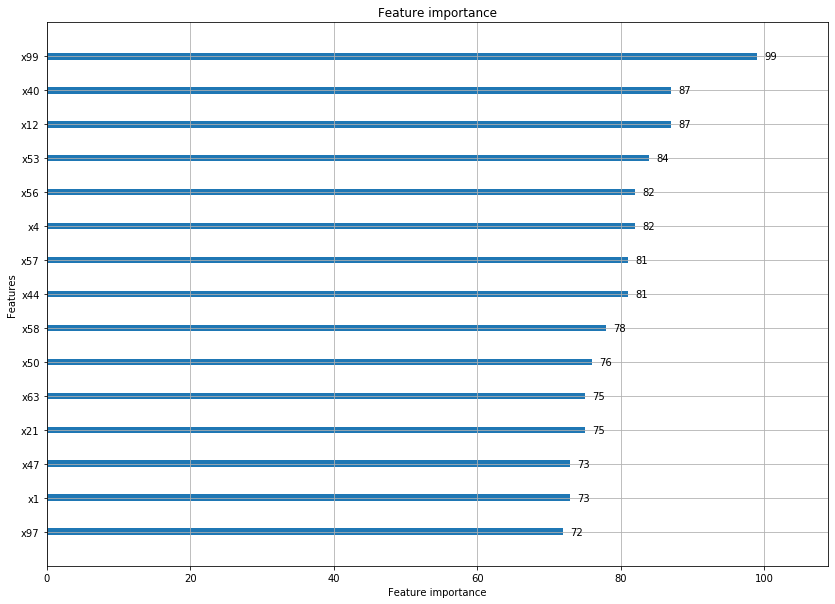

In [17]:
from lightgbm import plot_importance
plot_importance(lgm,max_num_features=15,figsize=(14,10))

In [18]:
lgm.feature_importances_
# can turn feature importance into dataframe, and make it easier to use. then sort values etc..


array([24, 73, 57, 65, 82, 50,  0,  0, 50,  0, 66,  0, 87,  0,  0,  0,  0,
        0, 25, 63, 27, 75, 38,  0,  0, 38,  0, 45,  0,  0,  0,  0,  0, 58,
        0, 26,  0, 67,  0,  0, 87, 41, 20, 65, 81, 25,  0, 73,  0, 51, 76,
       59,  0, 84,  0,  0, 82, 81, 78,  0,  0, 23,  0, 75,  0,  0, 56,  0,
        8, 16, 57, 41, 61, 36, 36, 71,  0, 32, 59, 42, 41,  0,  0, 67,  0,
       47,  0,  0,  0,  0, 19,  0,  0,  0,  0, 64, 59, 72,  0, 99],
      dtype=int32)

## CHARTS

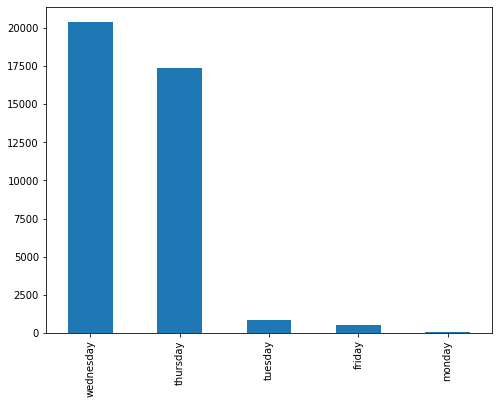

In [19]:
fig, ax = plt.subplots(figsize=(20,19))
dftn.x35.value_counts()[:20].plot(kind='bar',figsize=(8,6))
fig.savefig("topday.png", figsize=(20,12))

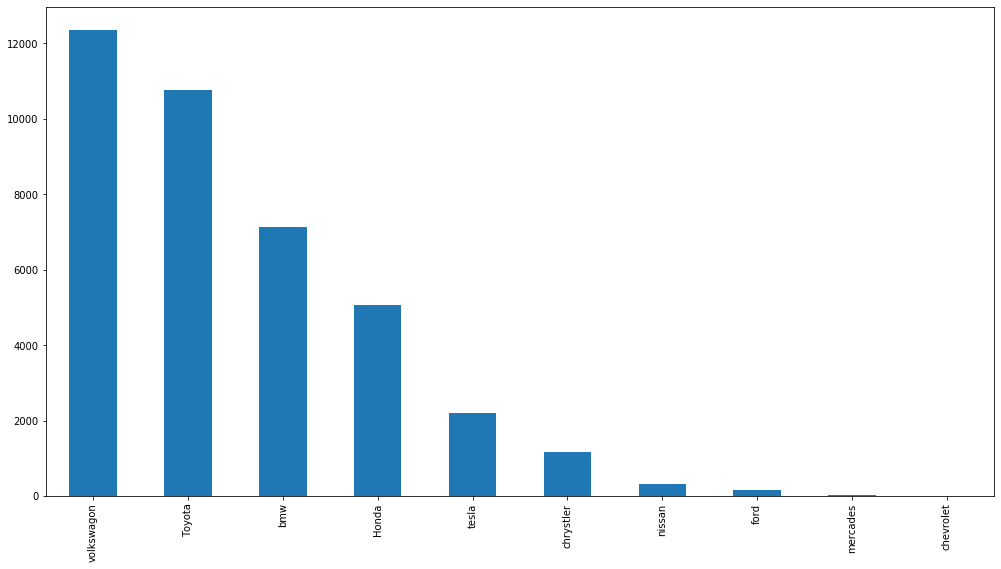

In [20]:
fig, ax = plt.subplots(figsize=(17,9))
dftn.x34.value_counts()[:30].plot(kind='bar')
fig.savefig("topvehicle.png", figsize=(19.20,10.80))

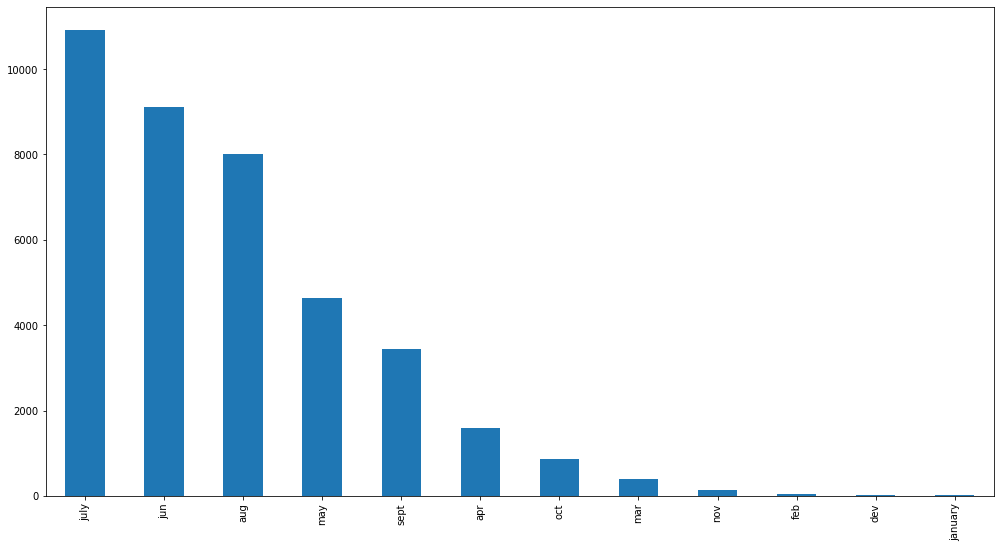

In [21]:
fig, ax = plt.subplots(figsize=(17,9))
dftn.x68.value_counts()[:20].plot(kind='bar')
fig.savefig("topmonth.png", figsize=(19.20,10.80))

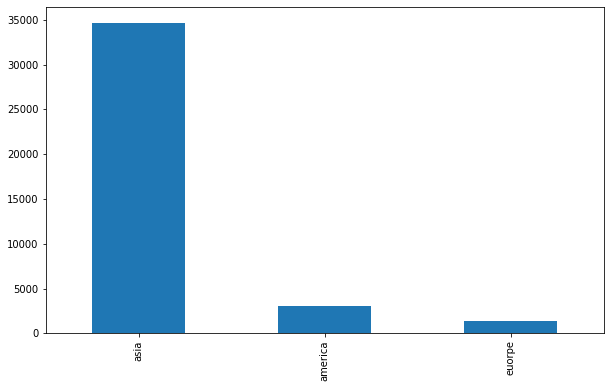

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
dftn.x93.value_counts()[:20].plot(kind='bar')
fig.savefig("topcontinent.png", figsize=(19.20,10.80))